In [1]:
import pandas as pd
import pyBigWig
import numpy as np
import seaborn as sns
import re


v='38'
#nbct_file='https://ftp.ncbi.nlm.nih.gov/geo/series/GSE30nnn/GSE30870/matrix/GSE30870_series_matrix.txt.gz'
#md_file='https://ftp.ncbi.nlm.nih.gov/geo/series/GSE33nnn/GSE33233/matrix/GSE33233_series_matrix.txt.gz'
#nb_file='http://smithdata.usc.edu/methbase/data/Heyn-Human-NewbornCentenarian-2012/Human_CD4T-Newborn/tracks_hg'+v'+/Human_CD4T-Newborn.hmr.bb'
#ct_file='http://smithdata.usc.edu/methbase/data/Heyn-Human-NewbornCentenarian-2012/Human_CD4T-100yr/tracks_hg'+v'+/Human_CD4T-100yr.hmr.bb'
data='/oak/stanford/groups/smontgom/moqri/data/meth/'
ct_bw='http://smithdata.usc.edu/methbase/data/Heyn-Human-NewbornCentenarian-2012/Human_CD4T-100yr/tracks_hg'+v+'/Human_CD4T-100yr.meth.bw'
nb_bw='http://smithdata.usc.edu/methbase/data/Heyn-Human-NewbornCentenarian-2012/Human_CD4T-Newborn/tracks_hg'+v+'/Human_CD4T-Newborn.meth.bw'
h_bw='http://smithdata.usc.edu/methbase/data/Xie-Human-2013/Human_H9/tracks_hg'+v+'/Human_H9.meth.bw'
#h_bw='http://smithdata.usc.edu/methbase/data/Laurent-ESC-2010/Human_H9ESC/tracks_hg'+v+'/Human_H9ESC.meth.bw'
#i_bw='http://smithdata.usc.edu/methbase/data/Lister-iPSC-2011/Human_ADSiPSC/tracks_hg'+v+'/Human_ADSiPSC.meth.bw'
i_bw='http://smithdata.usc.edu/methbase/data/Lister-iPSC-2011/Human_FFiPSC69/tracks_hg'+v+'/Human_FFiPSC69.meth.bw'
so_bw='http://smithdata.usc.edu/methbase/data/Vandiver-Human-2015/Human_Epidermis-old-sun-exposed/tracks_hg'+v+'/Human_Epidermis-old-sun-exposed.meth.bw'
#so_bw='http://smithdata.usc.edu/methbase/data/Vandiver-Human-2015/Human_Epidermis-old-sun-protected/tracks_hg'+v'+/Human_Epidermis-old-sun-protected.meth.bw'
sy_bw='http://smithdata.usc.edu/methbase/data/Vandiver-Human-2015/Human_Epidermis-young-sun-exposed/tracks_hg'+v+'/Human_Epidermis-young-sun-exposed.meth.bw'
#sy_bw='http://smithdata.usc.edu/methbase/data/Vandiver-Human-2015/Human_Epidermis-young-sun-protected/tracks_hg'+v'+/Human_Epidermis-young-sun-protected.meth.bw'
#hg19 h3k27='https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM733nnn/GSM733748/suppl/GSM733748_hg19_wgEncodeBroadHistoneH1hescH3k27me3StdPk.broadPeak.gz'
#hg19 h3k4='https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM733nnn/GSM733637/suppl/GSM733637_hg19_wgEncodeBroadHistoneHsmmH3k4me3StdPk.broadPeak.gz'
ezh_pk='https://ftp.ncbi.nlm.nih.gov/geo/series/GSE76nnn/GSE76626/suppl/GSE76626_ChIP-Seq_RPM.txt.gz'
suz=pd.read_table('suz',skiprows=1)
print(suz.shape)
def f(cell,ch):
    df=bws[cell].intervals("chr"+str(ch))
    print(len(df))
    df=pd.DataFrame(df)
    df.index=df[0]
    df=df[2]
    dfs.append(df)    
    return(dfs)

(16277, 9)


In [2]:
ezh=pd.read_table(ezh_pk,index_col=0)
ezh=ezh[ezh.Chromosome!='MT']
ezh=ezh[['Chromosome','Start','End','WT_EZH2']][ezh['WT_EZH2']>2]
ezh.columns=['chrom', 'chromStart', 'chromEnd', 'value']
ezh['chrom']=ezh.chrom.astype(str)
ezh.shape

/home/moqri/anaconda3/envs/stem/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3437: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(1219, 4)

In [3]:
blood=[i_bw,h_bw,nb_bw,ct_bw]
skin=[i_bw,h_bw,sy_bw,so_bw]

In [4]:
#cells=skin
cells=blood
bws={}
for cell in cells:
    bws[cell]=pyBigWig.open(cell)

22


/home/moqri/anaconda3/envs/stem/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


575094
576289
576289
576289


<ipython-input-154-bae0f5fc2de9>:15: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  df=pd.concat(dfs,1)


(2208, 6)


<ipython-input-154-bae0f5fc2de9>:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ez=df[df.h<.5][df['ez']]


<AxesSubplot:>

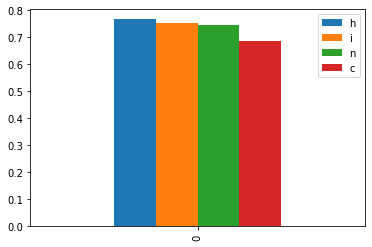

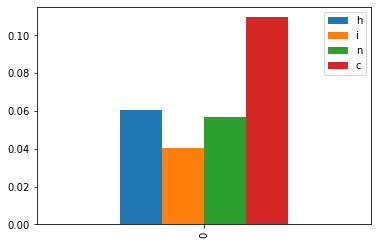

In [154]:
ggs=[]
ezs=[]
for ch in range(22,23):
    print(ch,end='\n')
    dfs=[]
    ez=ezh[ezh.chrom==str(ch)]
    #ez=ezh[ezh.chrom=='chr'+str(ch)][ezh.sourceCount>1]
    ez['r']=ez.apply(lambda x:range(x['chromStart'],x['chromEnd']),1)
    ez=ez['r'].tolist()
    ez1=set([item for sublist in ez for item in sublist])

    ez=ez1#.intersection(ez2)#.intersection(ez1)
    for cell in cells:
        dfs=f(cell,ch)
    df=pd.concat(dfs,1)
    df.columns=['i','h','n','c']
    df['ind']=df.index
    df['ez']=df.ind.apply(lambda x: x in(ez))
    gg=df[~df['ez']].mean()
    ggs.append(gg)
    ez=df[df.h<.5][df['ez']]
    print(ez.shape)
    ezs.append(ez.mean())   
ggs=pd.DataFrame(ggs)
ggs[['h','i','n','c']].plot(kind='bar')
ezs=pd.DataFrame(ezs)
ezs[['h','i','n','c']].plot(kind='bar')
#ggs.to_csv('ggs_skin')
#ezs.to_csv('ezs_skin')

In [155]:
dt=pd.read_table('https://hgdownload.soe.ucsc.edu/goldenPath/hg38/chromosomes/chr22.fa.gz')
print(len(dt)*50)
s=''.join(dt.iloc[:,0].values)
wcgw=[]
for st in ['ACGA','ACGT','TCGA','TCGT','AGCA','AGCT','TGCA','TGCT']:
    r=re.finditer(st,s)
    for i in r:
        wcgw.append(i.start())
print(len(wcgw))
so=pd.DataFrame(wcgw)
so.columns=['0']
so=so.sort_values(['0'])
so['d']=so['0'].shift(1)
so['u']=so['0'].shift(-1)
so['+']=so['0']-so['d']
so['-']=np.abs(so['0']-so['u'])
so['m']=so[['+','-']].min(1)
print(len(so))
print(len(so[so.m>15]))


(443905, 1)

443905
217343


In [200]:
df[(df.index.isin(so['0']+1))].mean()

i      7.526525e-01
h      7.609672e-01
n      7.245544e-01
c      6.191658e-01
ind    3.464056e+07
ez     2.833231e-03
dtype: float64

In [13]:
cells=skin
cells=blood
bws={}
for cell in cells:
    bws[cell]=pyBigWig.open(cell)

1
2262349
2264861
2264861
2264861


<ipython-input-14-641ae482c30c>:15: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  df=pd.concat(dfs,1)
<ipython-input-14-641ae482c30c>:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ez=df[df.h<.5][df['ez']]


(7925, 6)
2
2152283
2160685
2160685
2160685
(13208, 6)
3
1621655
1623298
1623298
1623298
(3242, 6)
4
1461107
1473490
1473490
1473490
(4284, 6)
5
1506105
1506379
1506379
1506379
(6249, 6)
6
1471466
1475127
1475127
1475127
(6364, 6)
7
1552561
1562329
1562329
1562329
(7102, 6)
8
1301100
1305345
1305345
1305345
(5129, 6)
9
1193964
1193972
1193972
1193972
(5580, 6)
10
1339061
1339066
1339066
1339066
(8000, 6)
11
1289082
1289125
1289125
1289125
(5084, 6)
12
1274263
1276854
1276854
1276854
(4606, 6)
13
797897
803626
803626
803626
(2174, 6)
14
858209
858254
858254
858254
(3335, 6)
15
863762
868363
868363
868363
(4290, 6)
16
1096745
1096745
1096745
1096745
(3249, 6)
17
1147496
1152915
1152915
1152915
(12569, 6)
18
677174
677179
677179
677179
(2401, 6)
19
1054829
1055116
1055116
1055116
(2255, 6)
20
717571
717624
717624
717624
(3692, 6)
21
372459
380355
380355
380355
(989, 6)
22
575094
576289
576289
576289
(2208, 6)


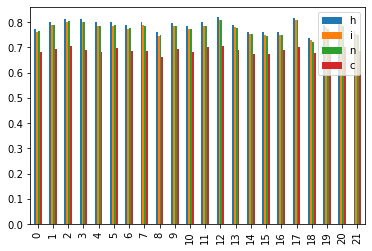

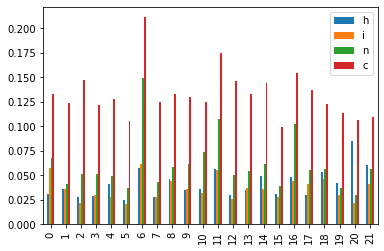

In [14]:
ggs=[]
ezs=[]
for ch in range(1,23):
    print(ch,end='\n')
    dfs=[]
    ez=ezh[ezh.chrom==str(ch)]
    #ez=ezh[ezh.chrom=='chr'+str(ch)][ezh.sourceCount>1]
    ez['r']=ez.apply(lambda x:range(x['chromStart'],x['chromEnd']),1)
    ez=ez['r'].tolist()
    ez1=set([item for sublist in ez for item in sublist])

    ez=ez1#.intersection(ez2)#.intersection(ez1)
    for cell in cells:
        dfs=f(cell,ch)
    df=pd.concat(dfs,1)
    df.columns=['i','h','n','c']
    df['ind']=df.index
    df['ez']=df.ind.apply(lambda x: x in(ez))
    gg=df[~df['ez']].mean()
    ggs.append(gg)
    ez=df[df.h<.5][df['ez']]
    print(ez.shape)
    ezs.append(ez.mean())   
ggs=pd.DataFrame(ggs)
ggs[['h','i','n','c']].plot(kind='bar')
ezs=pd.DataFrame(ezs)
ezs[['h','i','n','c']].plot(kind='bar')
ggs.to_csv('ggs_blood')
ezs.to_csv('ezs_blood')

In [1]:
df

NameError: name 'df' is not defined